In [8]:
import sys 
sys.path.append('../')
import copy

import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 8]

import TimeSeries.Preprocessing as pp


print("is GPU:",tf.test.is_gpu_available())
print("is cuda:",tf.test.is_built_with_cuda())
print(tf.__version__)

is GPU: True
is cuda: True
2.10.0


In [9]:
#Load data

#Tranings daten
data = pd.read_csv("Förderband_Rodel_Ausgang.csv")


In [10]:
data.head()

,Timestamp,Drucksensor,Gesamtstrom,Ansteuerung Förderband,Ansteuerung Drehtisch,Ansteuerung Zuführförderband,Obere Position Greifer Erreicht,Untere Position Greifer Erreicht,Boolwert ob die Position des Separators für Flüssigkeiten geschlossen ist,Boolwert ob die Position des Separators für Feststoffen geschlossen ist,...,Integerwert für den Motorstrom am Transportförderband,Integerwert für den Motorstrom am Drehtisch,Integerwert für den Motorstrom am Zuführförderband,Integerwert für die Raumtemperatur,Integerwert für die Temperatur am Motorgehäuse des Transportförderbands,Boolwert zur Ansteuerung des Flaschenfixierers,Boolwert zur Ansteuerung des der Greiferbacken,Boolwert zur Einleitung der Greifer-Verfahrbewegung nach unten,Boolwert zur Einleitung der Greiferdrehung auf 0°,Boolwert zur Einleitung der Greiferdrehung auf 270°
0,0,603,10958,False,False,False,False,False,True,True,...,0,2,0,5587,7103,True,True,True,False,True
1,6,603,10956,False,False,False,False,False,True,True,...,0,2,1,5598,7094,True,True,True,False,True
2,12,603,10958,False,False,False,False,False,True,True,...,0,2,1,5610,7093,True,True,True,False,True
3,17,603,10936,False,False,False,False,False,True,True,...,0,2,1,5610,7064,True,True,True,False,True
4,23,603,10936,False,False,False,False,False,True,True,...,0,2,1,5600,7090,True,True,True,False,True


In [11]:
name_list = list(data.columns.values.tolist())

name_dict = {} 
for i in range(len(name_list)):
    name_dict[i]=name_list[i]


In [12]:
print(name_dict)

{0: 'Timestamp', 1: 'Drucksensor', 2: 'Gesamtstrom', 3: 'Ansteuerung Förderband', 4: 'Ansteuerung Drehtisch', 5: 'Ansteuerung Zuführförderband', 6: 'Obere Position Greifer Erreicht', 7: 'Untere Position Greifer Erreicht', 8: 'Boolwert ob die Position des Separators für Flüssigkeiten geschlossen ist', 9: 'Boolwert ob die Position des Separators für Feststoffen geschlossen ist', 10: 'Boolwert zur Ansteuerung des Separators für Flüssigkeiten', 11: 'Boolwert zur Ansteuerung des Separators für Feststoffe', 12: 'Integerwert für den Motorstrom am Transportförderband', 13: 'Integerwert für den Motorstrom am Drehtisch', 14: 'Integerwert für den Motorstrom am Zuführförderband', 15: 'Integerwert für die Raumtemperatur', 16: 'Integerwert für die Temperatur am Motorgehäuse des Transportförderbands', 17: 'Boolwert zur Ansteuerung des Flaschenfixierers', 18: 'Boolwert zur Ansteuerung des der Greiferbacken', 19: 'Boolwert zur Einleitung der Greifer-Verfahrbewegung nach unten', 20: 'Boolwert zur Einlei

In [13]:
data.shape

(10469, 22)

Timestamp


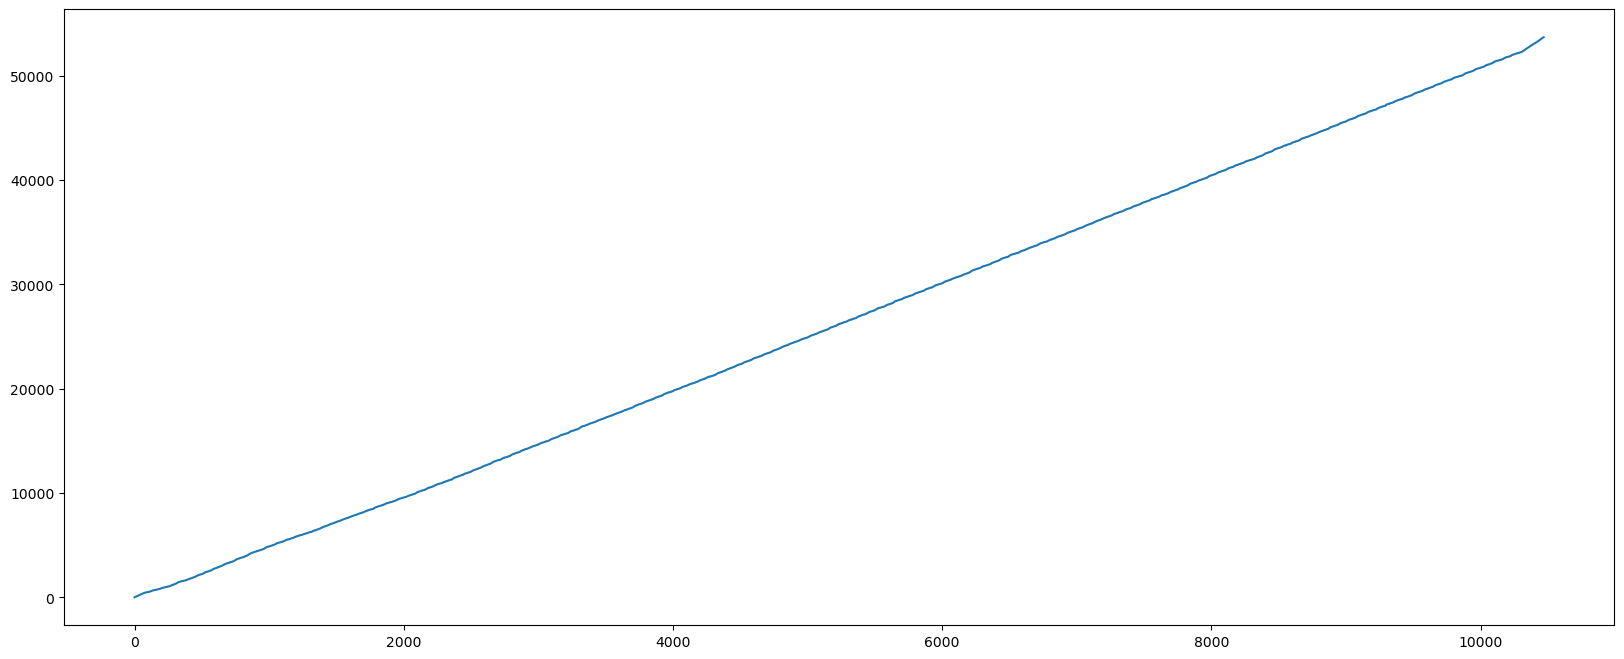

Drucksensor


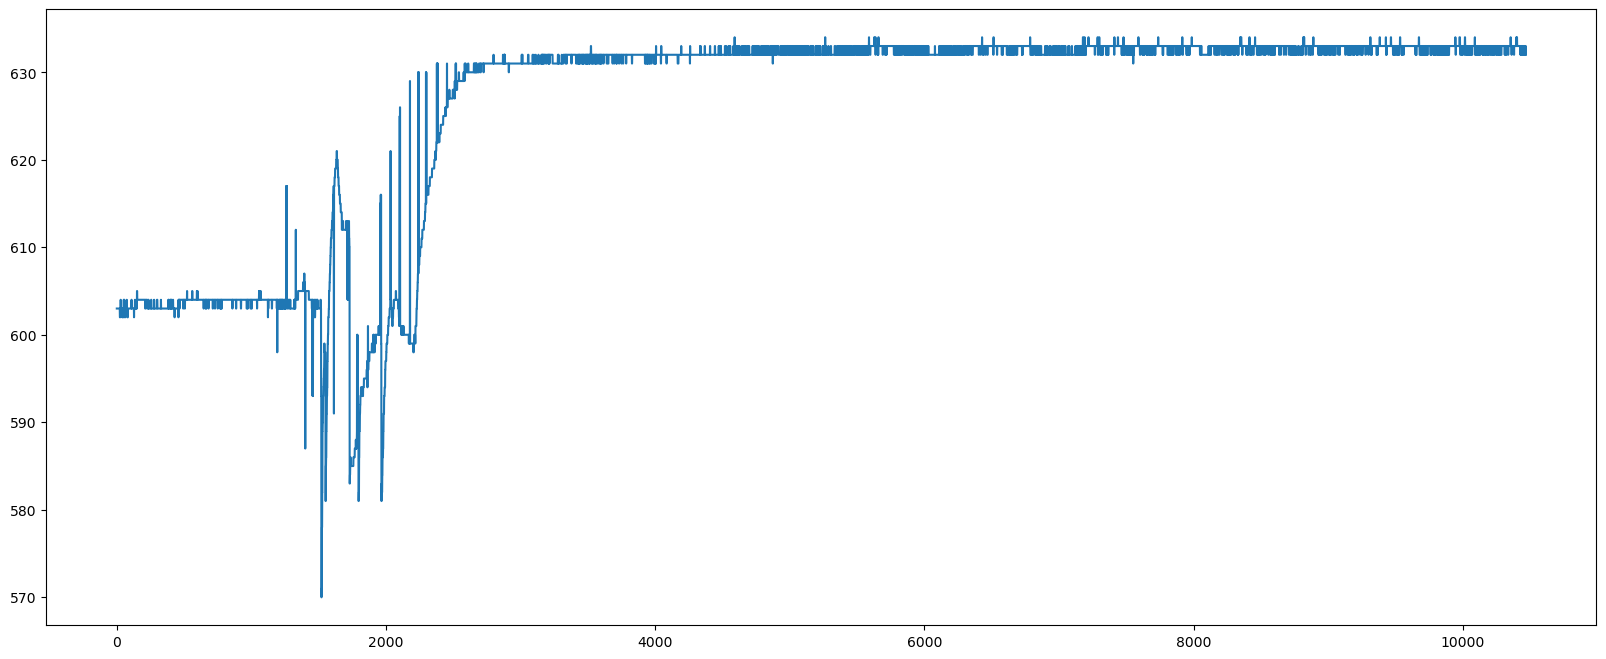

Gesamtstrom


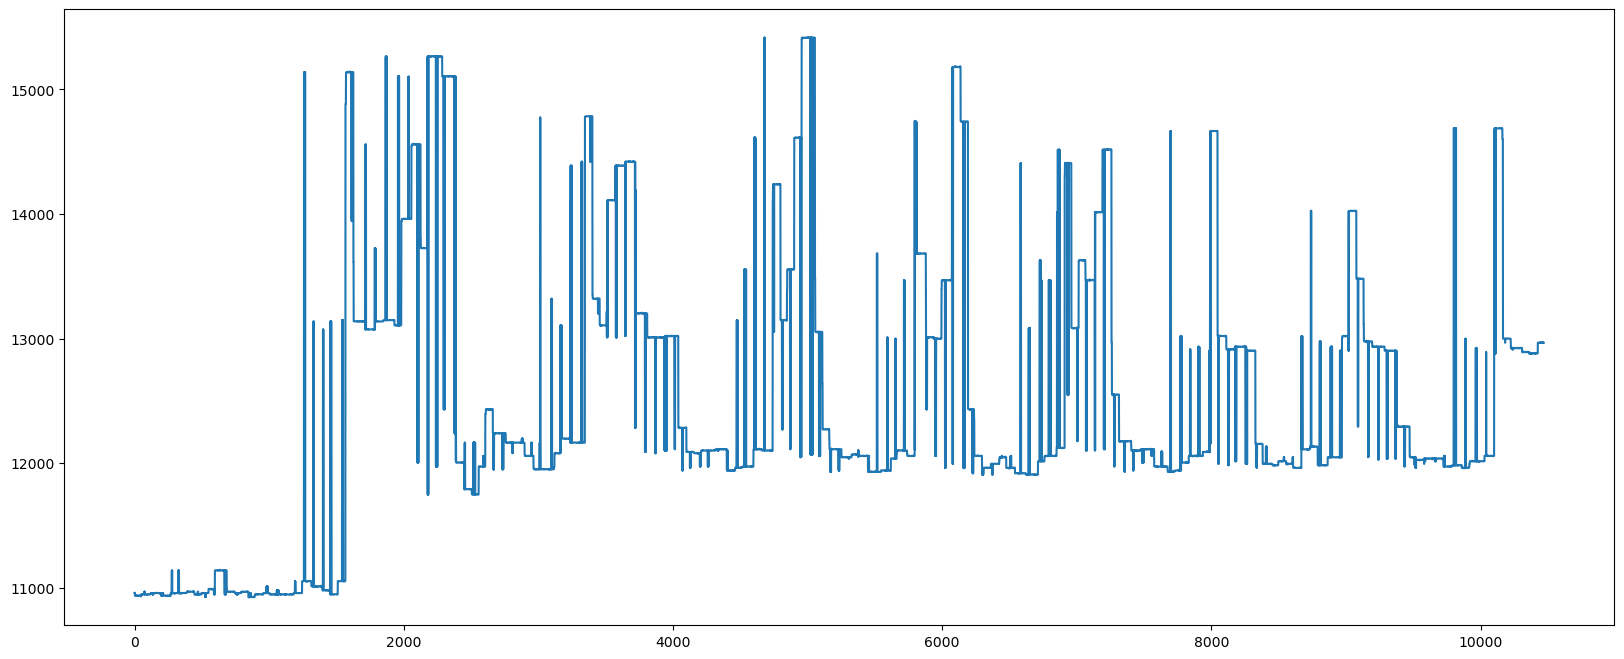

Ansteuerung Förderband


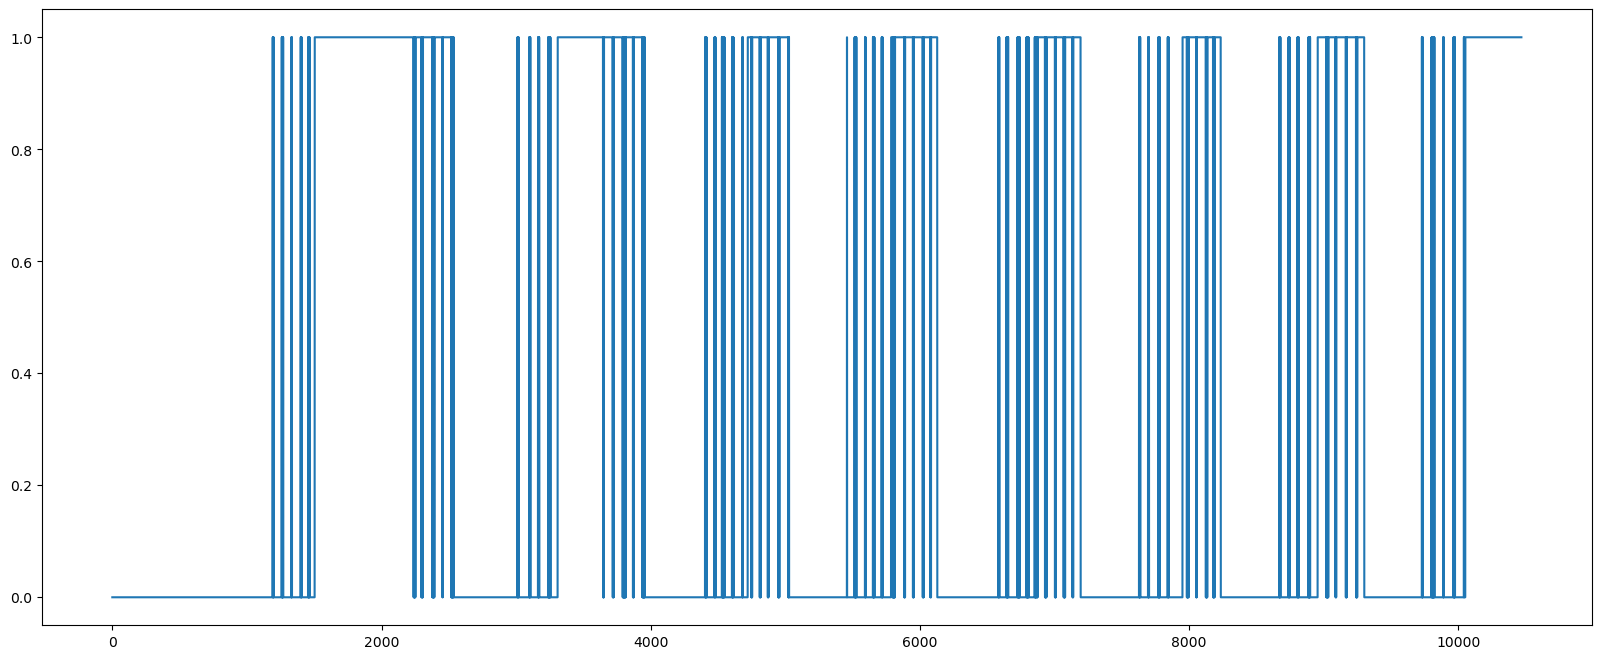

Ansteuerung Drehtisch


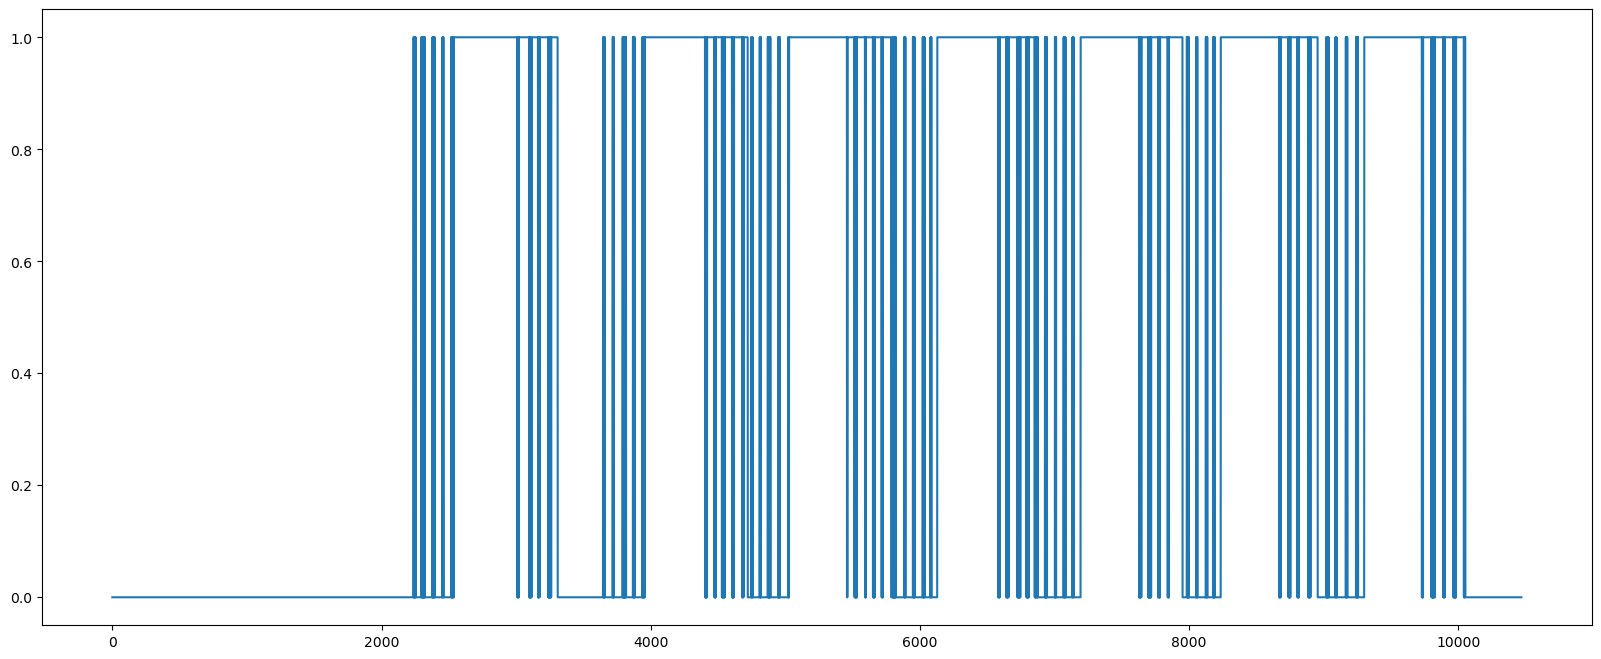

Ansteuerung Zuführförderband


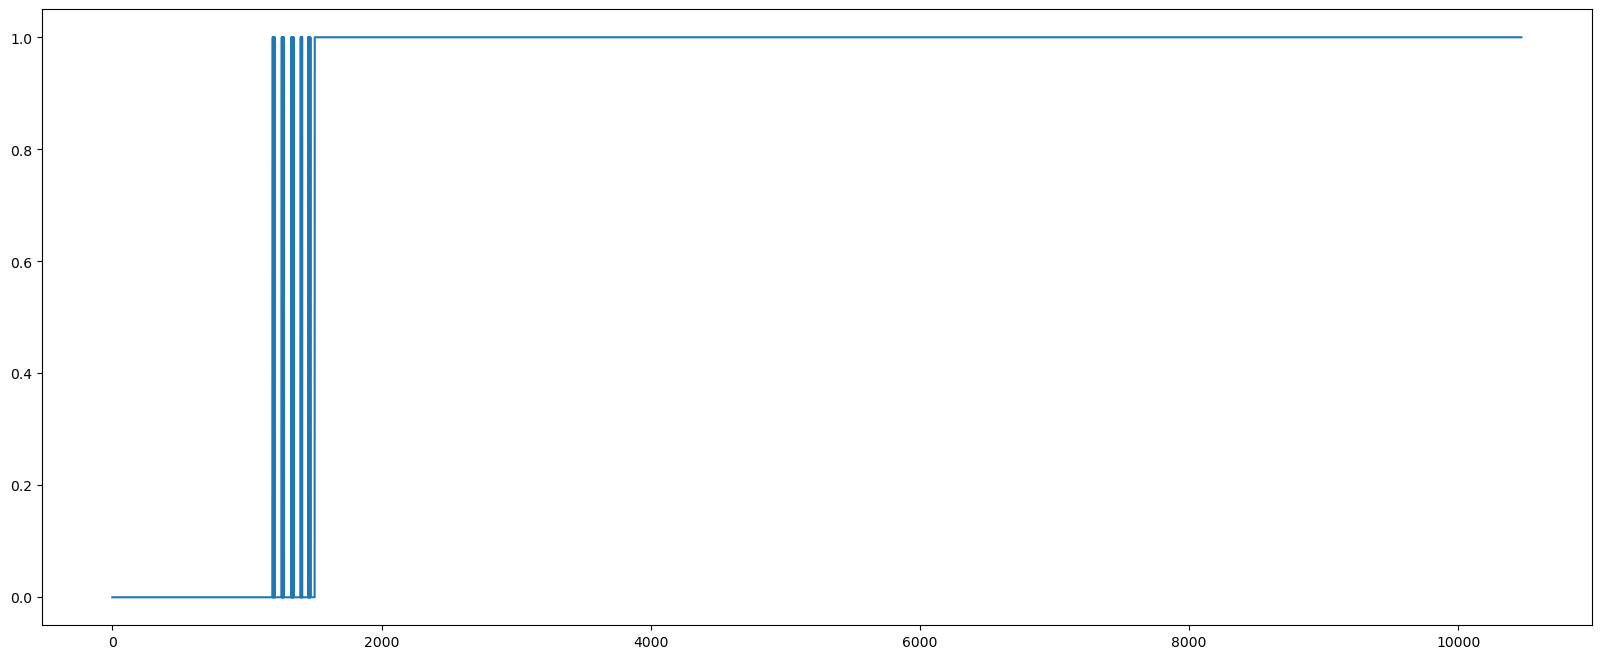

Obere Position Greifer Erreicht


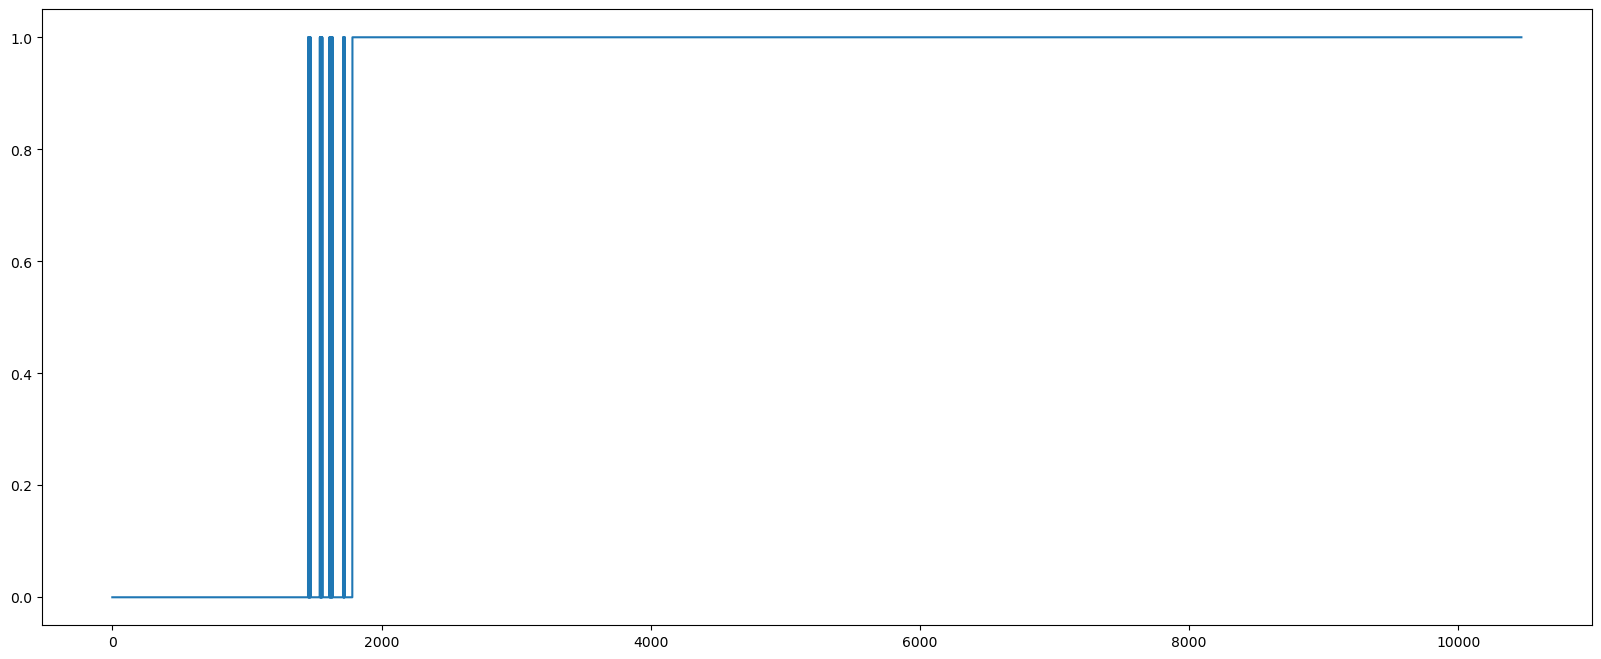

Untere Position Greifer Erreicht


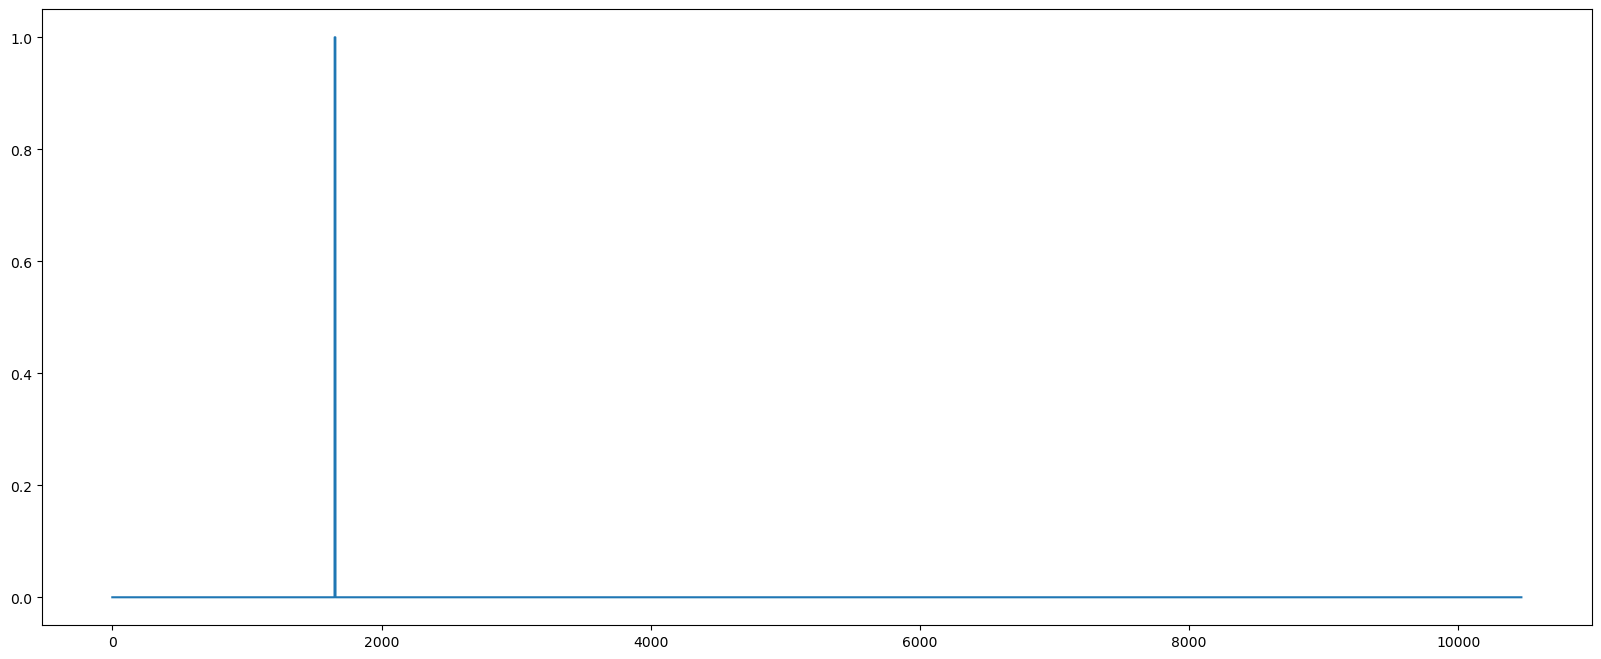

Boolwert ob die Position des Separators für Flüssigkeiten geschlossen ist


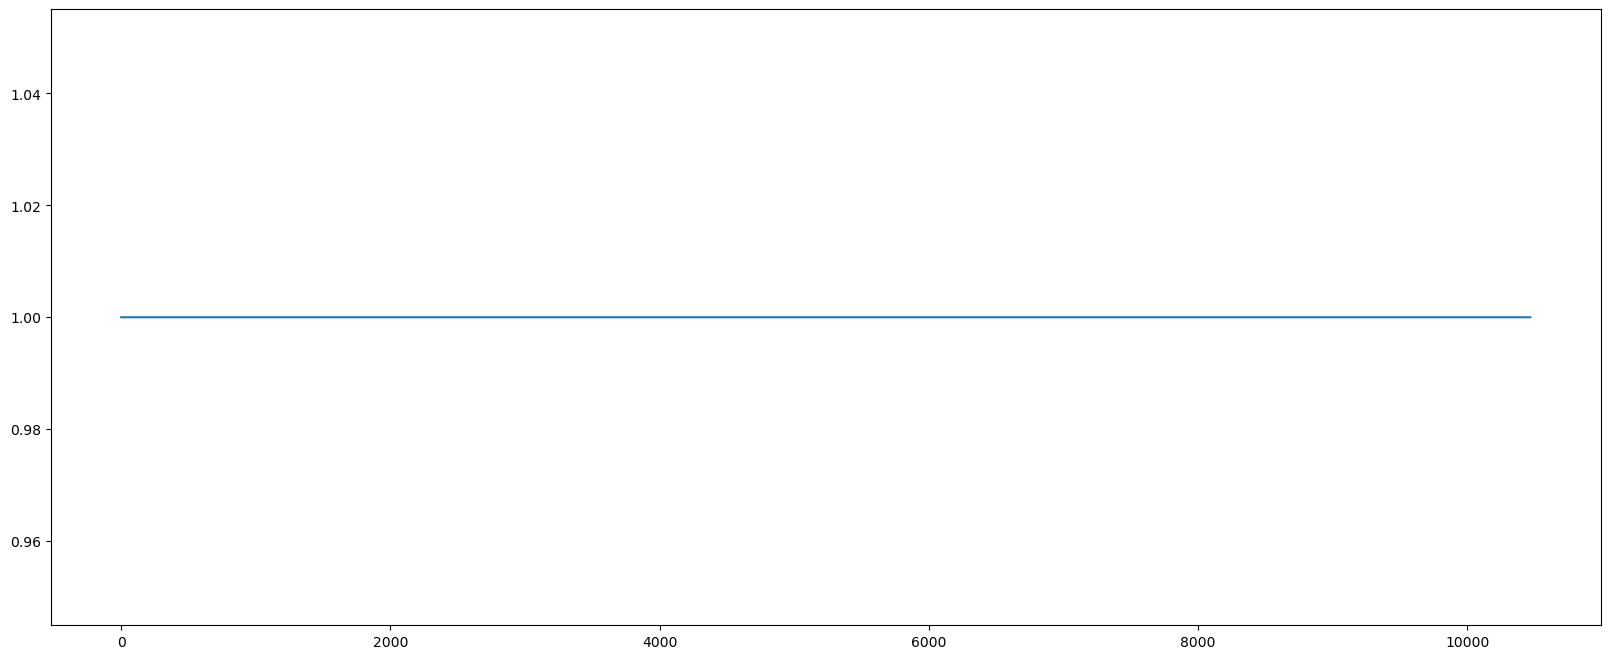

Boolwert ob die Position des Separators für Feststoffen geschlossen ist


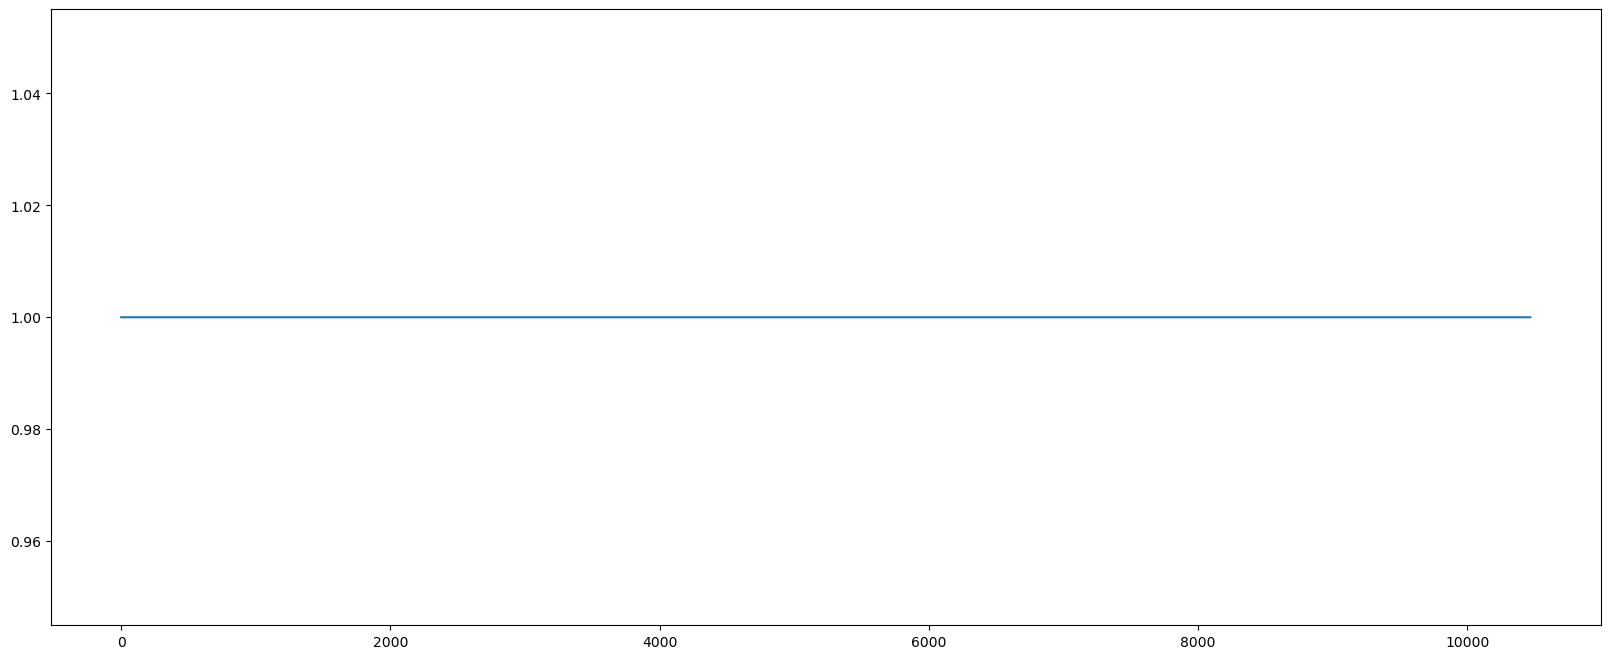

Boolwert zur Ansteuerung des Separators für Flüssigkeiten


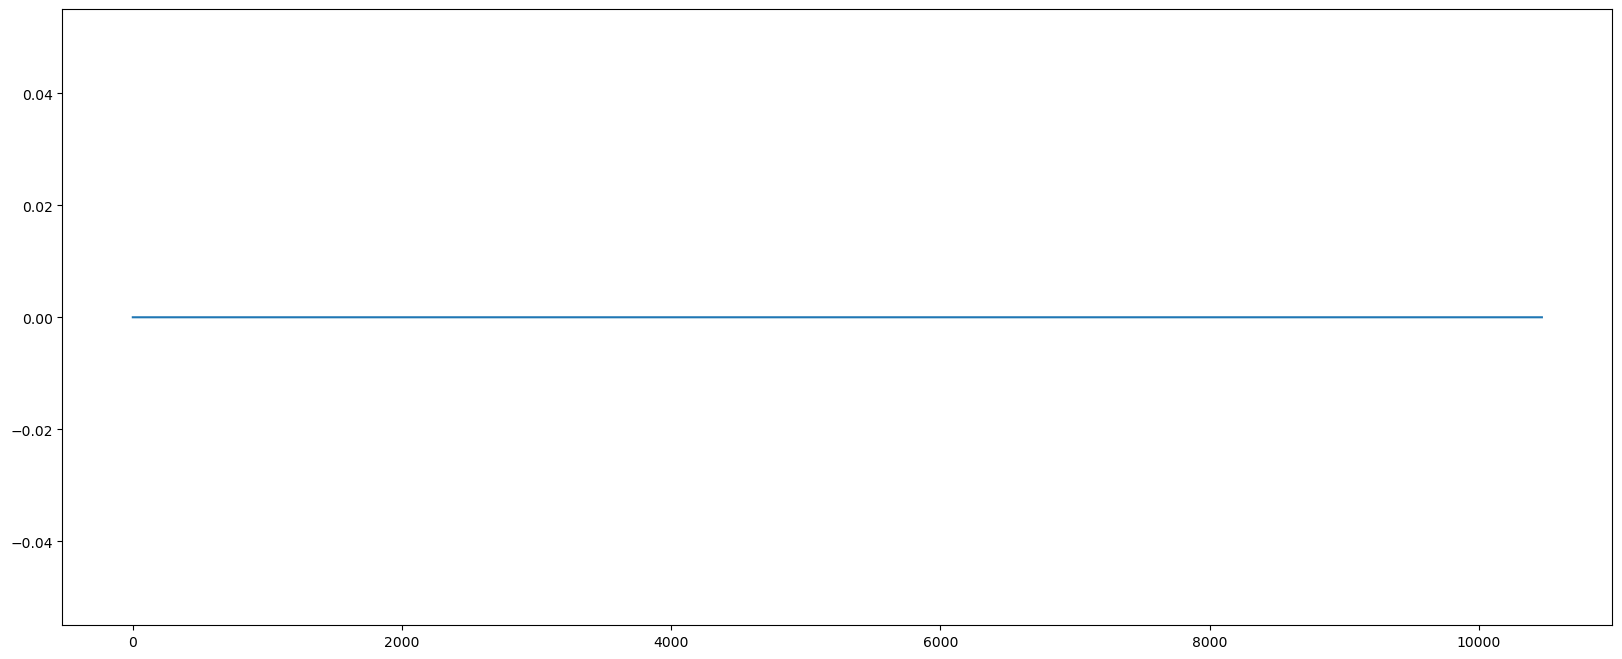

Boolwert zur Ansteuerung des Separators für Feststoffe


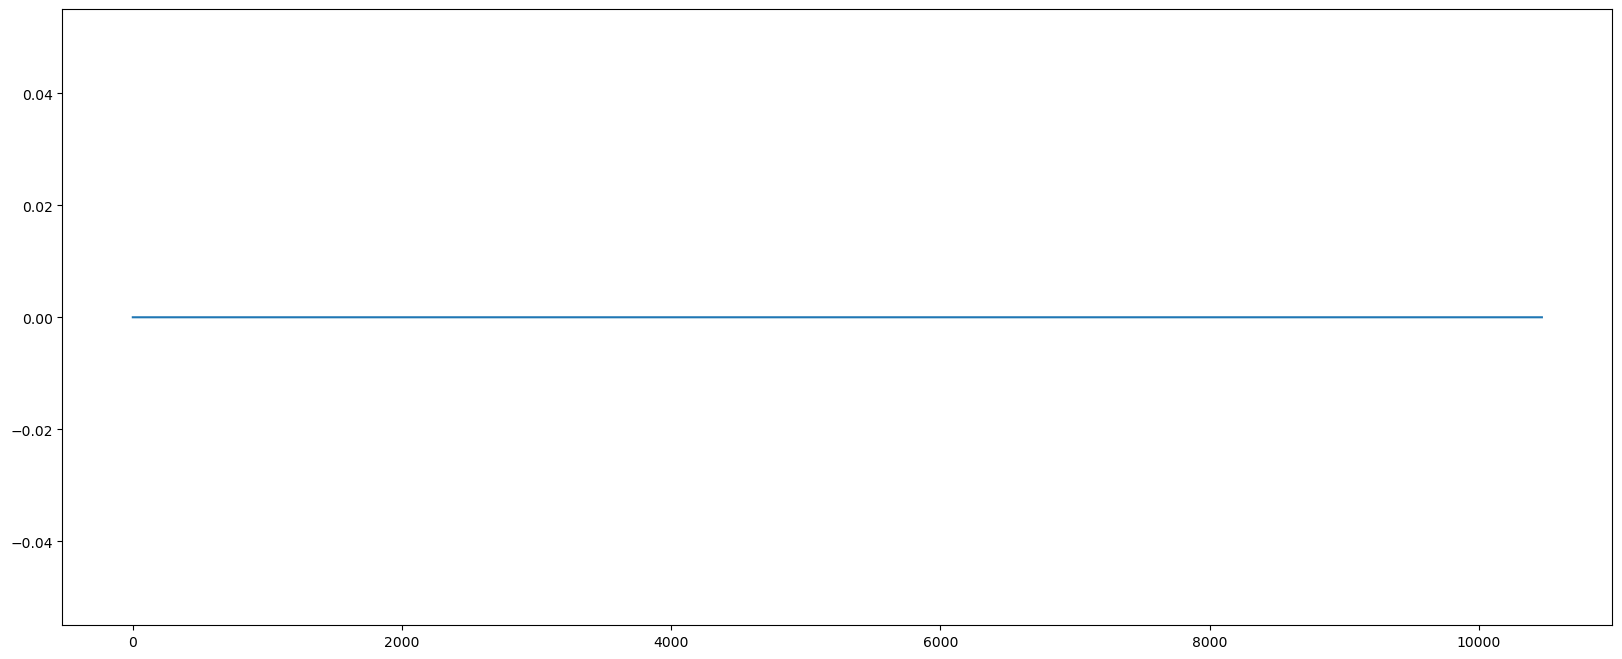

Integerwert für den Motorstrom am Transportförderband


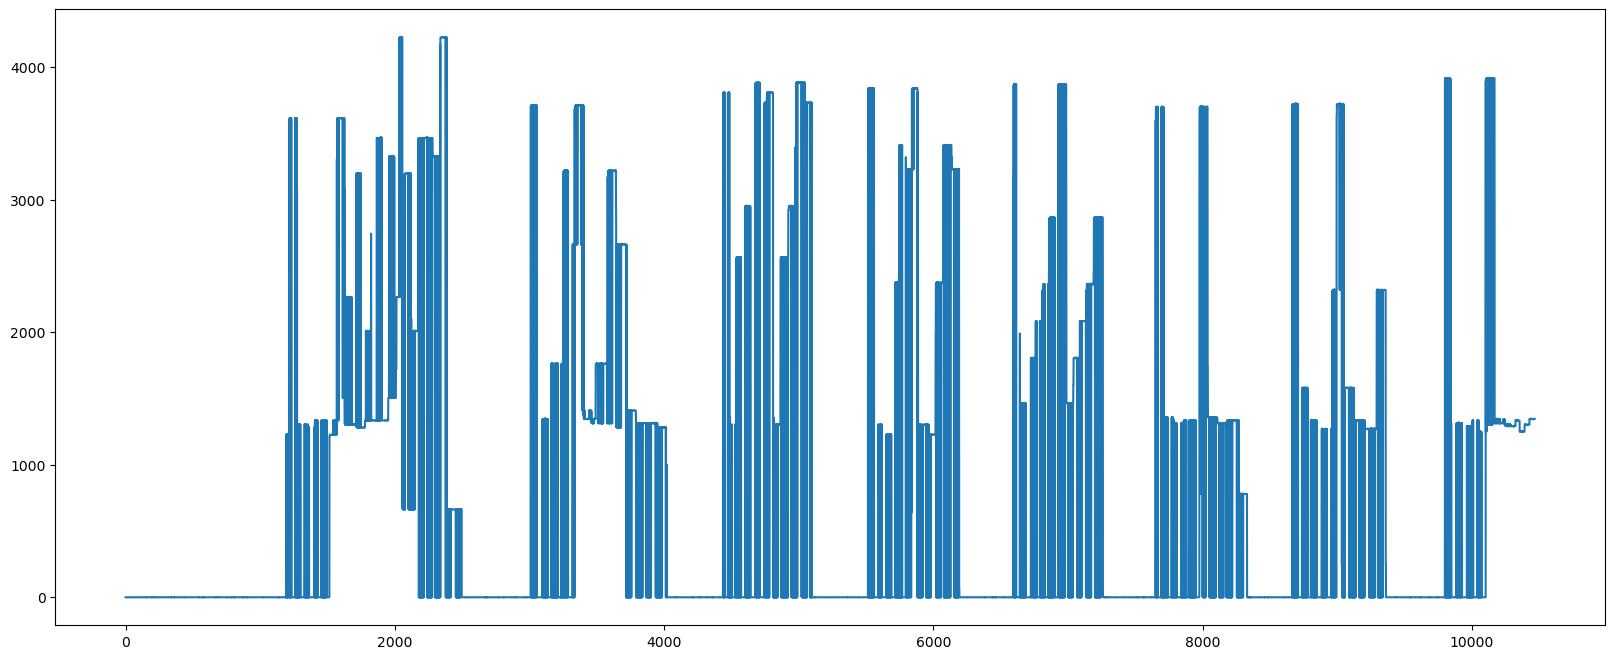

Integerwert für den Motorstrom am Drehtisch


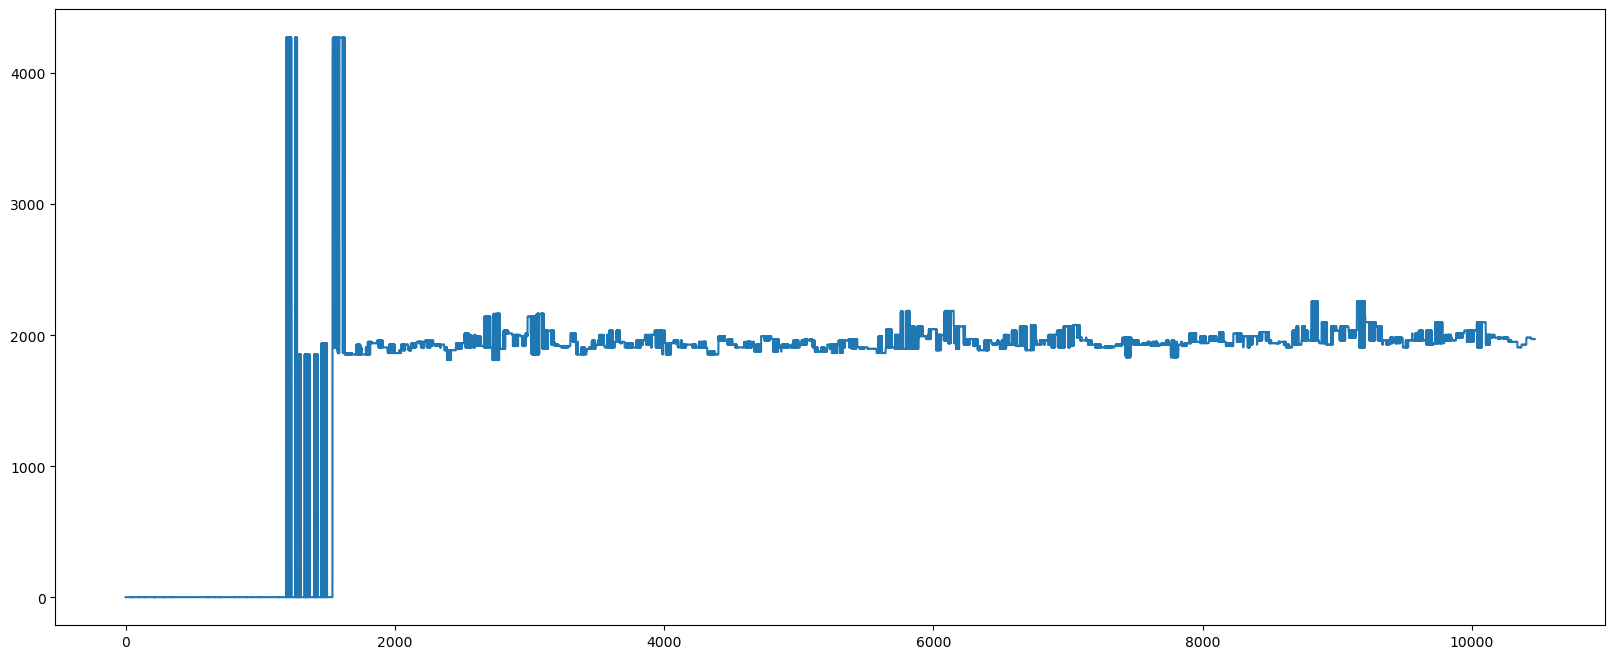

Integerwert für den Motorstrom am Zuführförderband


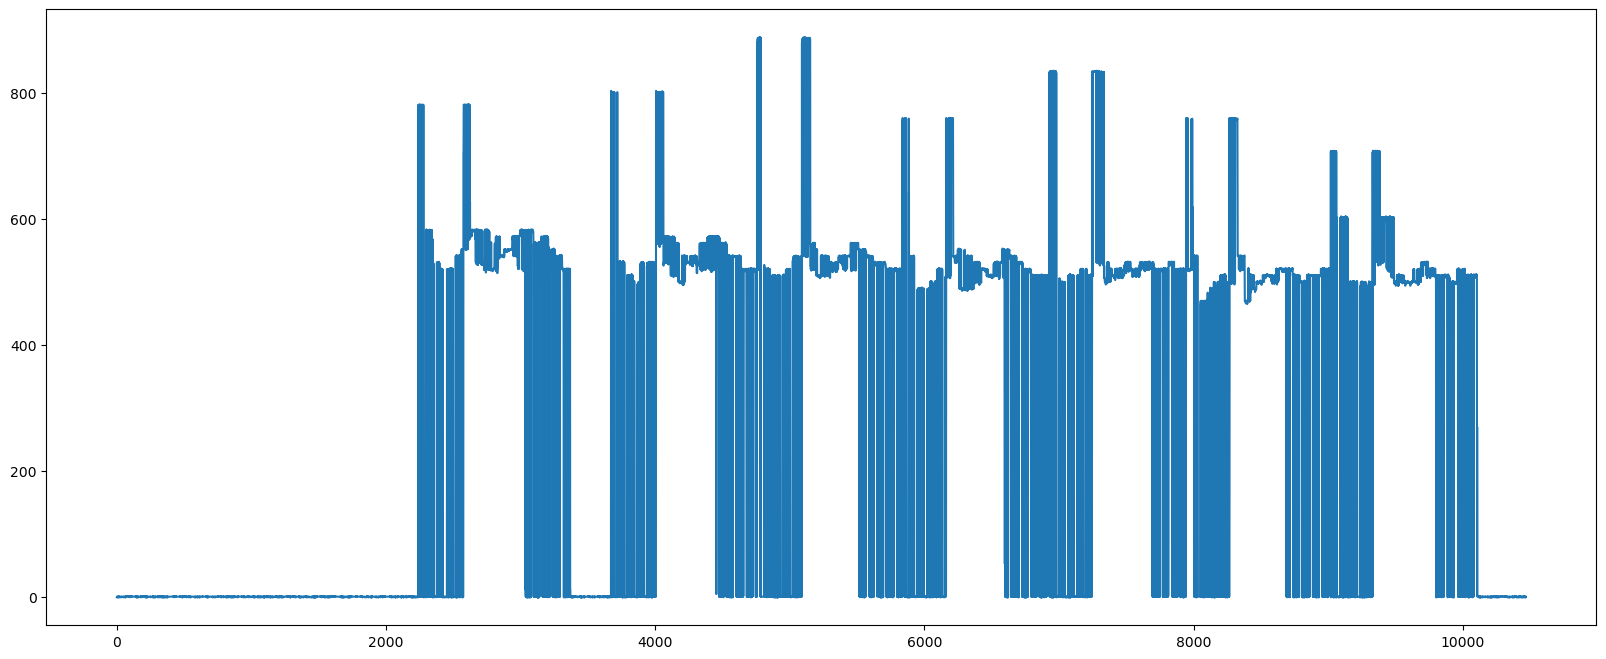

Integerwert für die Raumtemperatur


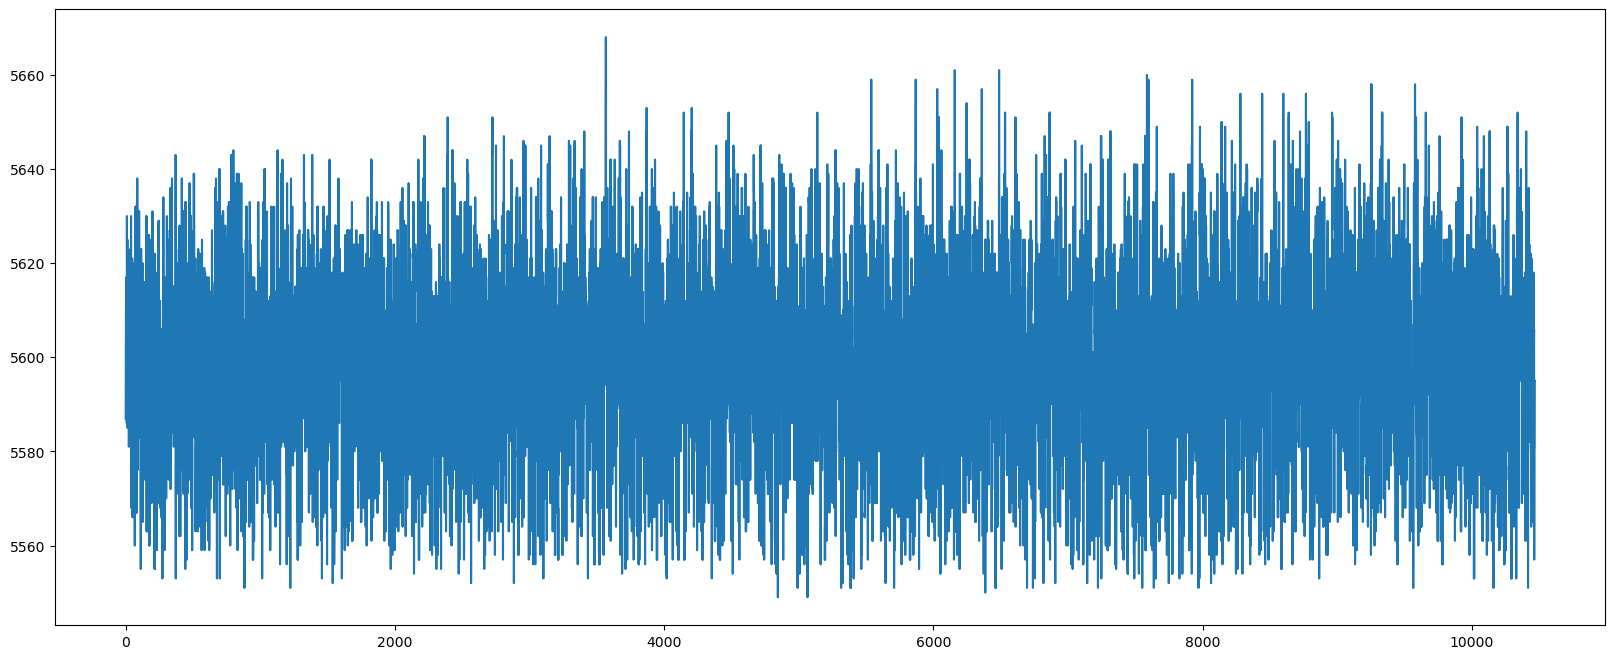

Integerwert für die Temperatur am Motorgehäuse des Transportförderbands


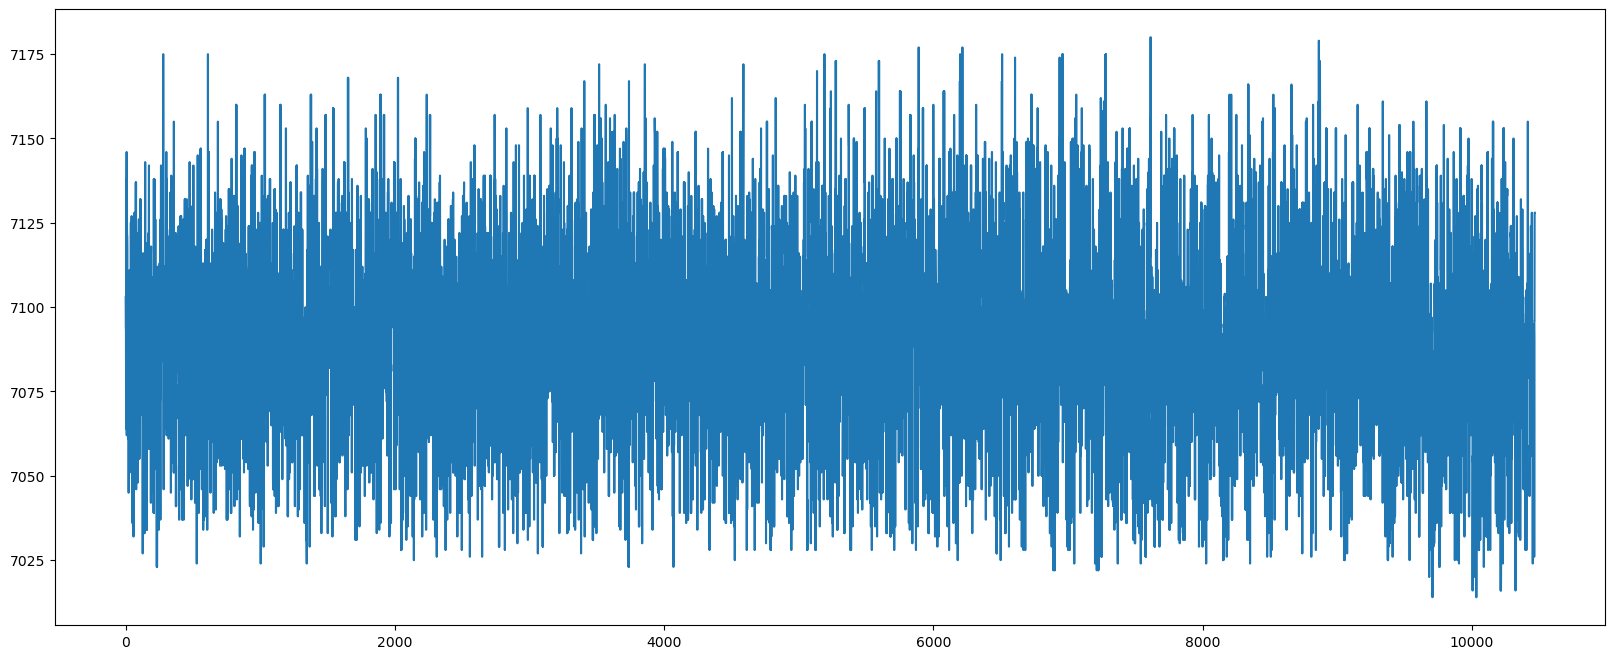

Boolwert zur Ansteuerung des Flaschenfixierers


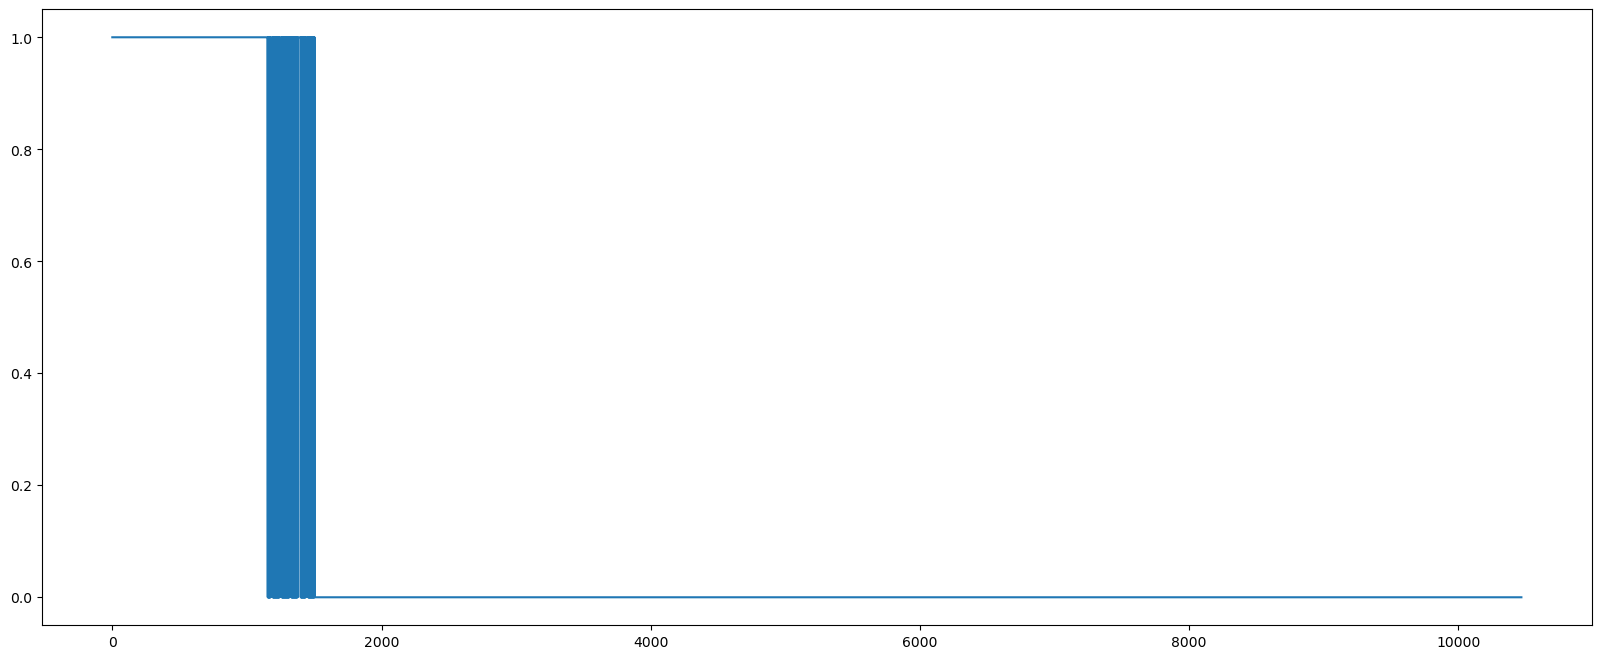

Boolwert zur Ansteuerung des der Greiferbacken


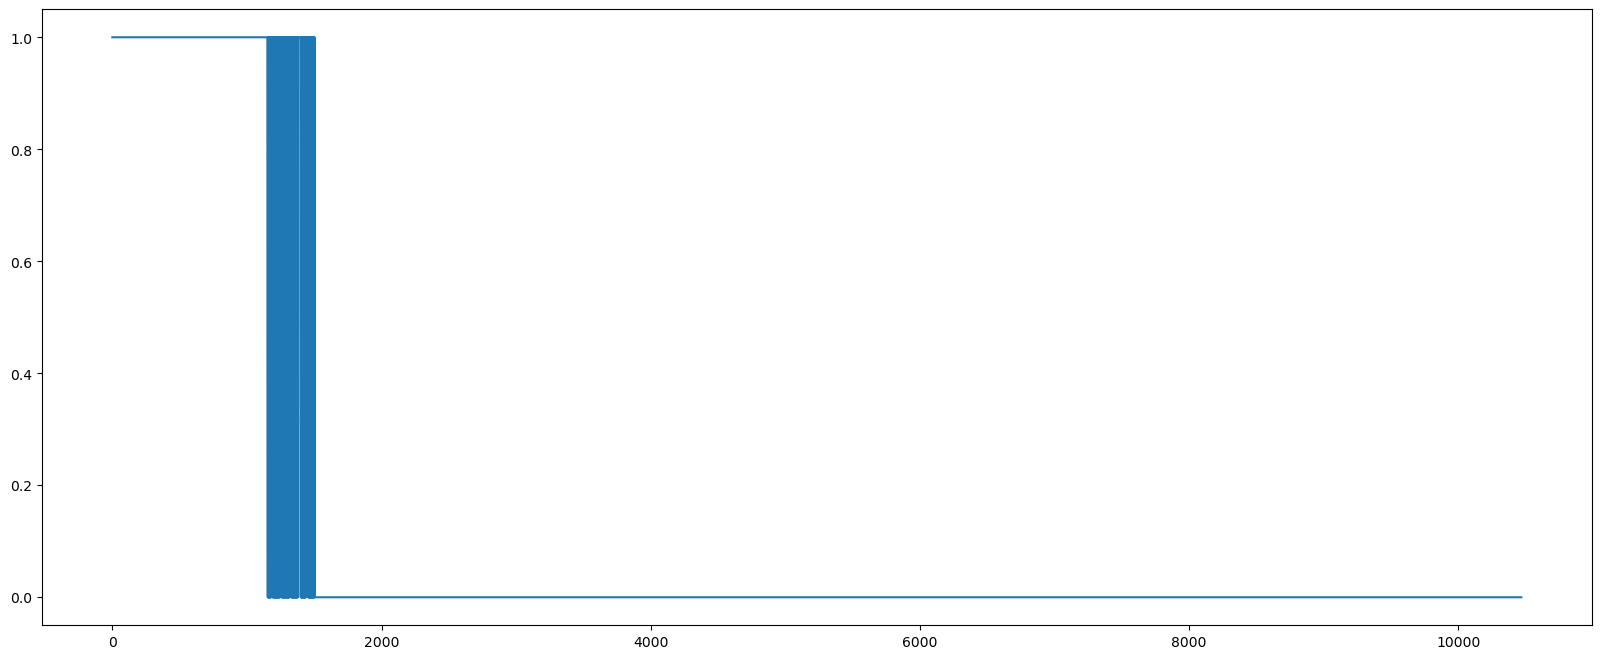

Boolwert zur Einleitung der Greifer-Verfahrbewegung nach unten


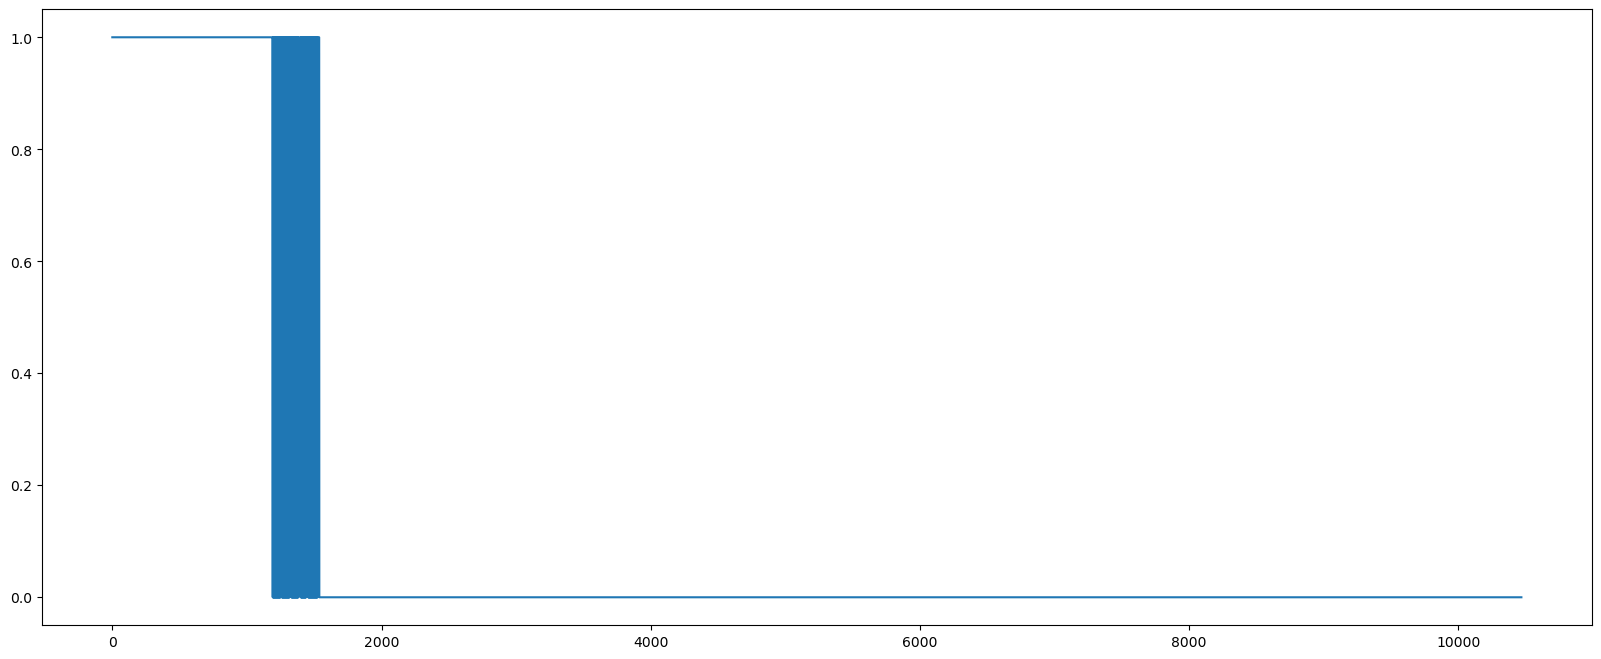

Boolwert zur Einleitung der Greiferdrehung auf 0°


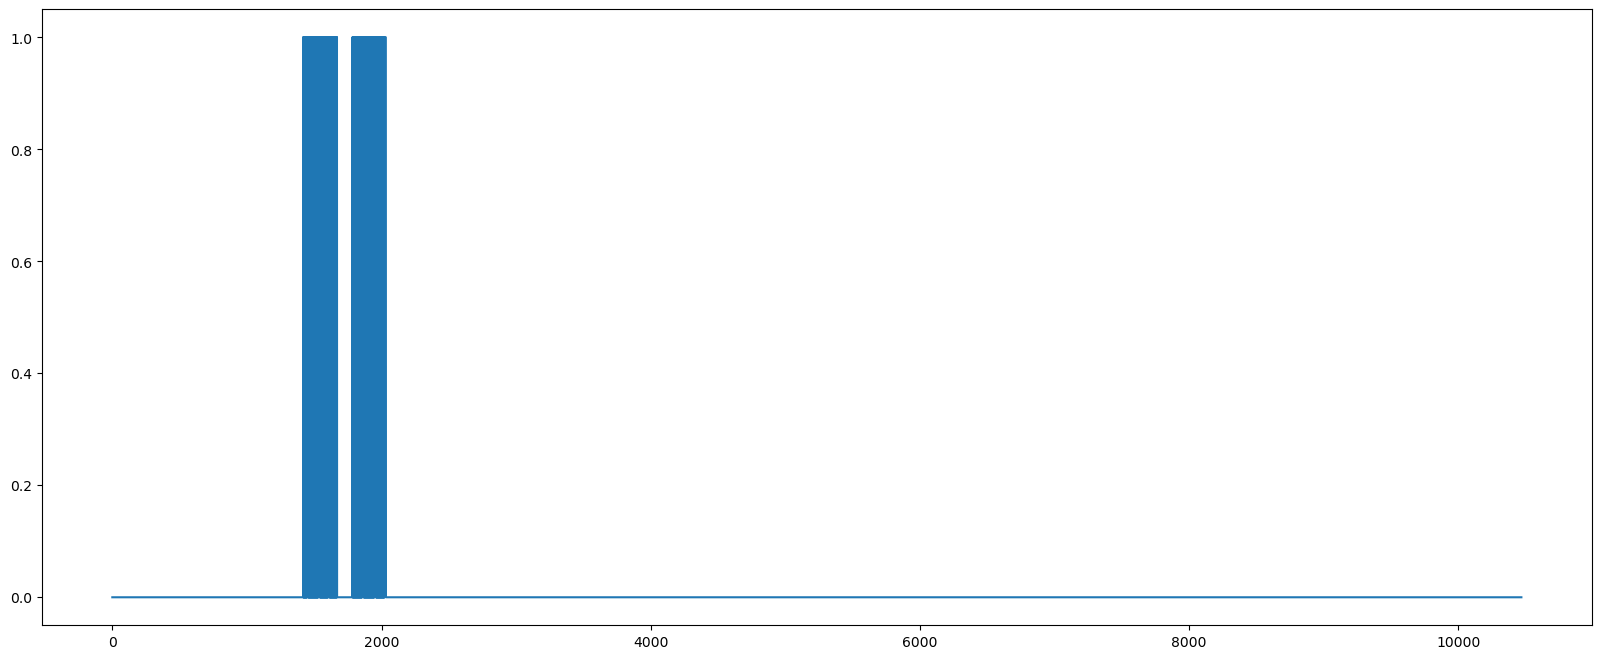

Boolwert zur Einleitung der Greiferdrehung auf 270°


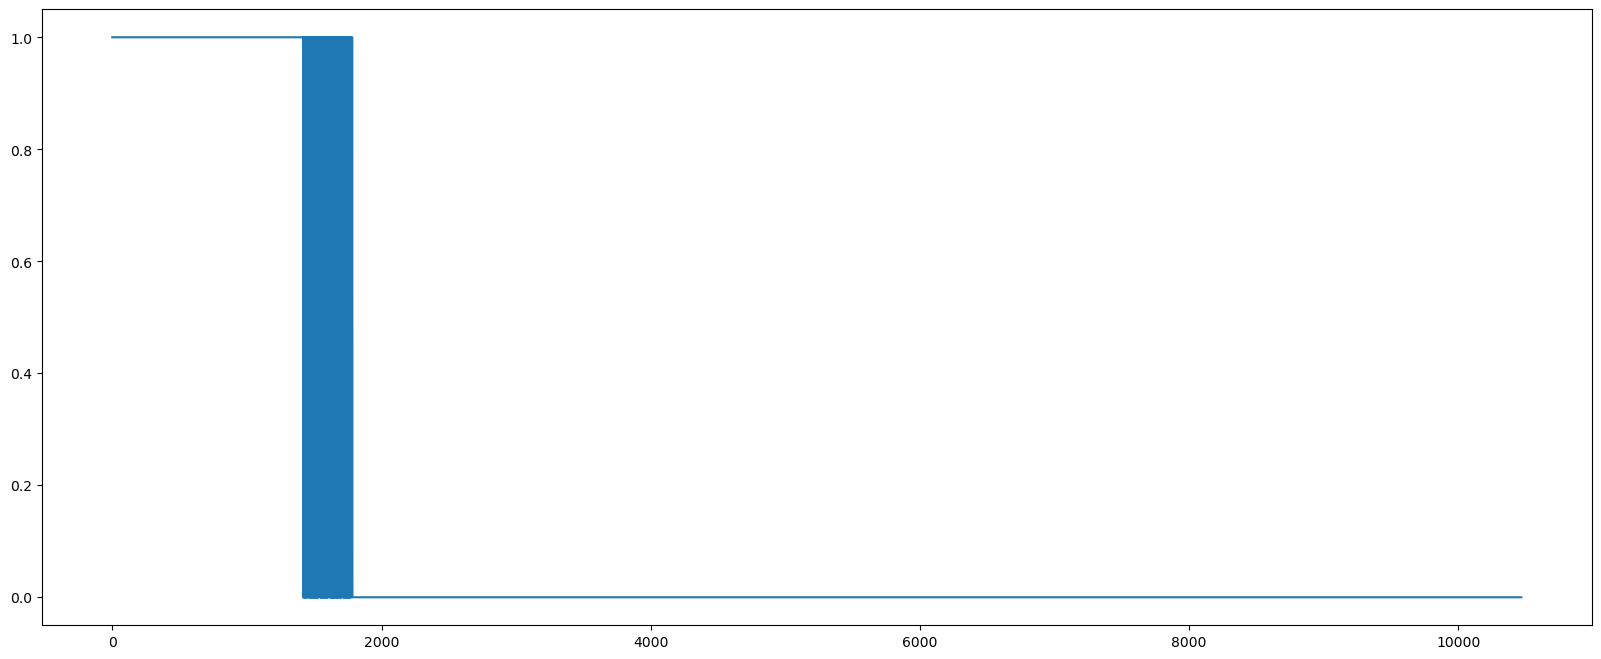

In [14]:
for i in range(len(name_list)):
#for i in [2]:
    print(name_list[i])
    plt.plot(pp.resample_timeseries(data.iloc[:,i], 1))
    plt.show()